In [7]:
# project CNN by MAUZUM SHAMIL

# importing libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt

from keras.utils import to_categorical,plot_model
import os


In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoder.fit([[0],[1]])

# 1 - tomato
# 0 - apple

OneHotEncoder()

# loading file 

In [10]:
# tomato

data =[]
paths = []
result =[]

for r, d, f in os.walk(r"C:\Users\dell\Desktop\train\tomatoes"):
    for file in f:
        if '.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)

    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
   

In [12]:
# apple

paths = []

for r,d,f in os.walk(r"C:\Users\dell\Desktop\train\apples"):
    for file in f:
        if '.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)

    if (img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [13]:
data = np.array(data)
#list to array conversion
data.shape

(290, 128, 128, 3)

In [14]:
result=np.array(result)
#list to array conversion
result.shape
result=result.reshape(290,2)

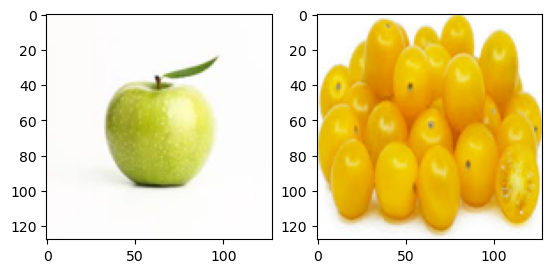

In [18]:
# data visulizatiom
plt.subplot(1,2,1)
plt.imshow(data[220])
plt.subplot(1,2,2)
plt.imshow(data[100])

# splitting and training 

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

# model creation

In [25]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2),input_shape=(128,128,3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', padding = 'Same' ))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

print(model.summary())


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [34]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
x_train.shape

(232, 128, 128, 3)

In [36]:
x_test.shape

(58, 128, 128, 3)

In [37]:
y_train.shape

(232, 2)

In [38]:
history = model.fit(x_train,y_train,epochs=10,batch_size=64, verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4996 - loss: 27.9981
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5111 - loss: 16.0789
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6114 - loss: 8.2101
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7025 - loss: 3.6987
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7878 - loss: 0.9810
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7488 - loss: 0.7820
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7977 - loss: 0.5553
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8191 - loss: 0.4184
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8133 - loss: 0.4168
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8821 - loss: 0.2906


# performance analysis

In [39]:
score = model.evaluate(x_test,y_test,batch_size=64)
print(" the test accuracy : %0.2f%%" % (100.0 * score[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.6379 - loss: 0.6063
 the test accuracy : 63.79%


#  model prediction

In [50]:
def names(number):
    if number == 0:
        return 'apple'
    else:
        return 'tomato'

71.49409651756287% confidence this is tomato


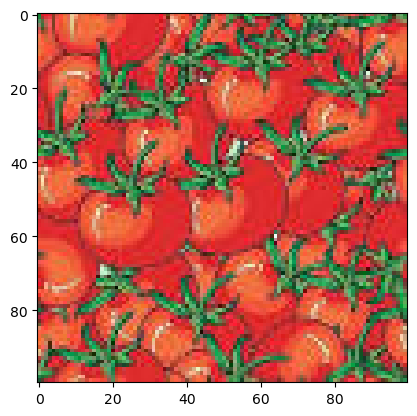

In [51]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\train\tomatoes\img_p1_5.jpeg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% confidence this is ' + names(classification))